In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Titanic.csv


# Первый взгляд

In [340]:
df = pd.read_csv('/kaggle/input/Titanic.csv')

In [341]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [342]:
# Уберем ненужные столбцы. Очевидно, что ID, имя и номер билета мало способствуют шансу на выживание.
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [343]:
# Посмотрим на данные еще раз
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Аналитика

Посмотрим на общую статистику выживаемости.
Видно, что погибших гораздо больше, чем выживших

In [344]:
# Посмотрим на общую статистику выживаемости
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Видно, что погибших гораздо больше, чем выживших

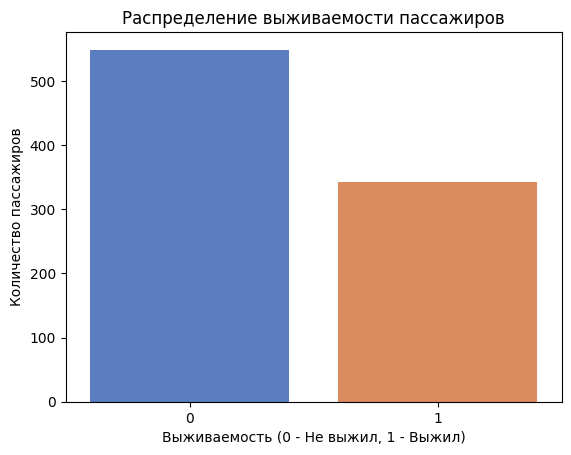

In [345]:
sns.countplot(x='Survived', data=df, palette='muted')
plt.title('Распределение выживаемости пассажиров')
plt.xlabel('Выживаемость (0 - Не выжил, 1 - Выжил)')
plt.ylabel('Количество пассажиров')
plt.show()

In [346]:
# Посмотрим на статистику выживаемости в зависимости от пола.
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Женщины выживали чаще, чем мужчины. Это можно связать с тем, что на шлюпки в первую очередь  пропускали женщин и детей.

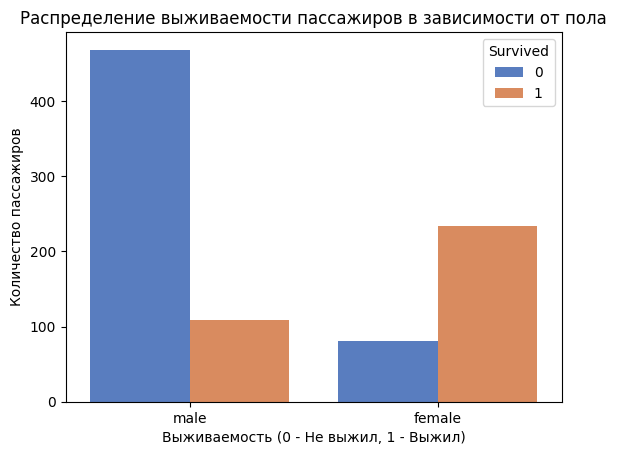

In [347]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='muted')
plt.title('Распределение выживаемости пассажиров в зависимости от пола')
plt.xlabel('Выживаемость (0 - Не выжил, 1 - Выжил)')
plt.ylabel('Количество пассажиров')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


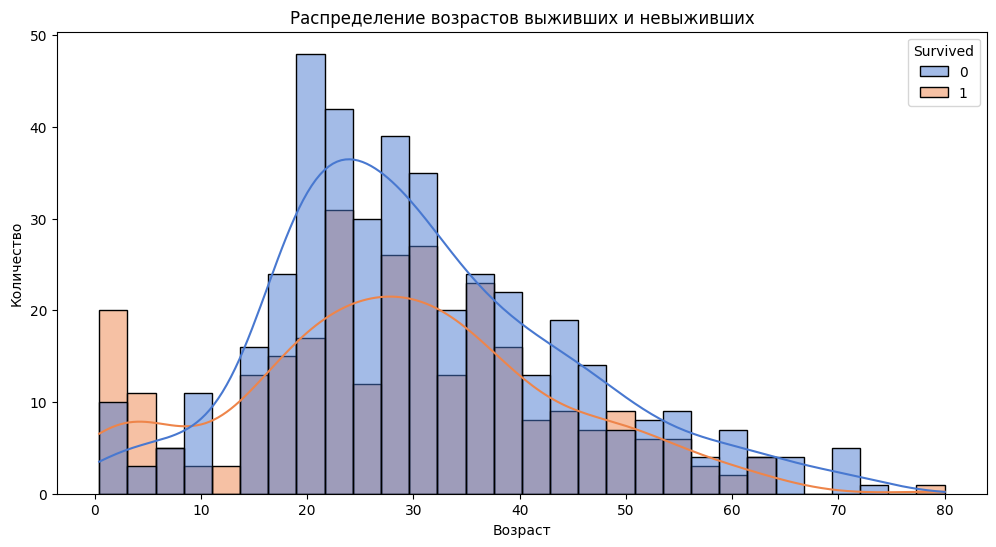

In [348]:
# Посмотрим на распределение возрастов в зависимости от выживаемости
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='muted')
plt.title('Распределение возрастов выживших и невыживших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Заметно, что есть выброс в диапазоне малолетних детей. Вероятно, они были с родителями, которые помогли им спастись.

In [349]:
# Посмотрим на статистику выживаемости в зависимости от класса
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Можно сделать вывод, что люди с более высоким классом выживали чаще, чем другие. Это можно связать с расположением кают, возможно, их близостью к выходу.

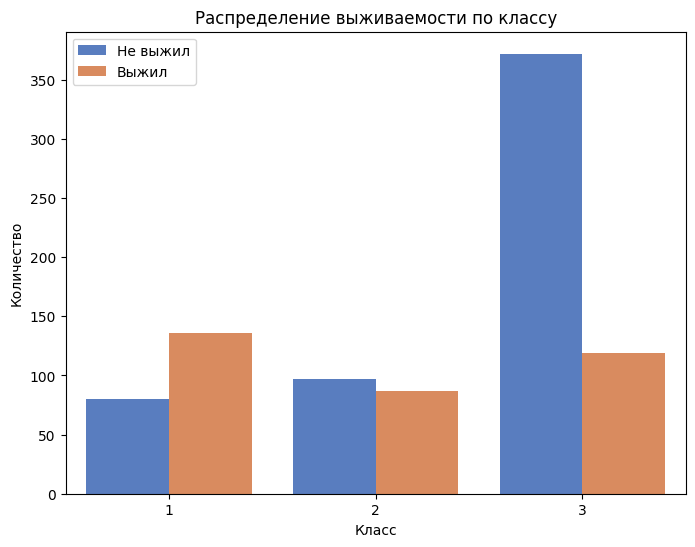

In [350]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='muted')
plt.title('Распределение выживаемости по классу')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(['Не выжил', 'Выжил'])
plt.show()

In [351]:
# Посмотрим на статистику выживаемости в зависимости от размера семьи.

# Создание признака размера семьи
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 для учета самого пассажира

# Создание признака одинокий пассажир или нет
df['IsAlone'] = 1  
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

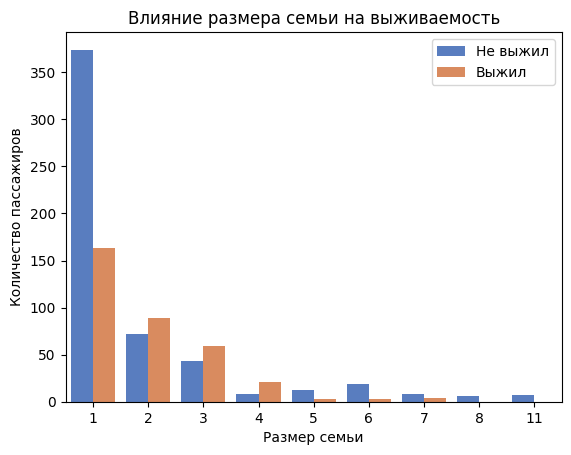

In [352]:
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='muted')
plt.title('Влияние размера семьи на выживаемость')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжил', 'Выжил'])
plt.show()

Видно, что люди с маленькими семьями выживали чаще. Это можно связать с тем, что им нужно было меньше думать о том, что нужно спасать еще и других помимо себя. Но и смертность среди них выше.

In [353]:
# Посмотрим на статистику выживаемости в зависимости от типа каюты

# Извлечение типа каюты (первая буква)
df['CabinType'] = df['Cabin'].str.extract(r'([A-Za-z])')

cabin_survival = df.groupby('CabinType')['Survived'].mean().reset_index()
, palette='muted'

"palette='muted'"

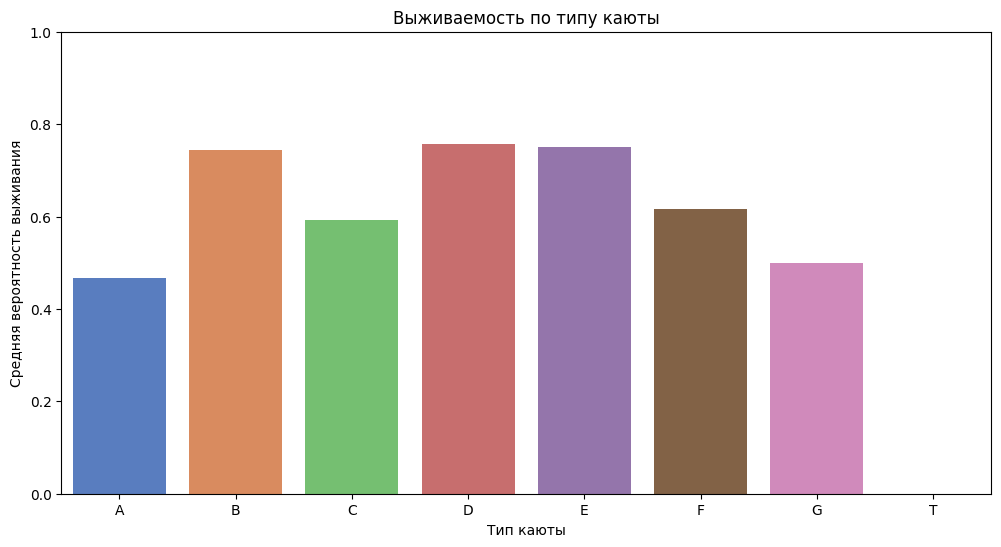

In [354]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cabin_survival, x='CabinType', y='Survived', palette='muted')
plt.title('Выживаемость по типу каюты')
plt.ylabel('Средняя вероятность выживания')
plt.xlabel('Тип каюты')
plt.ylim(0, 1)  # Ограничиваем ось Y от 0 до 1
plt.show()

Сначала было непонятно, почему график получился настолько неинформативным. Но потом я увидела, что в колонке Cabin слишком много пропусков, что и могло повлиять на статистику

# Подготовка датасета

In [355]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
IsAlone         0
CabinType     687
dtype: int64

In [356]:
# Избавляемся от ненужных колонок из-за большого количества пропусков
df.drop(columns=['Cabin', 'CabinType'], inplace=True)

In [357]:
# Заполним недостающие значения возраста медианой
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_30/3203512440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [358]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [359]:
#Заполним недостающие значения самым частовстречающимся
df['Embarked'] = df['Embarked'].fillna('S')

In [360]:
# Создадим признак ценовой категории билета
df['FareBand'] = pd.qcut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])
# Создадим признак возрастной категории пассажиров
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Adult', 'Senior', 'Elderly'])

In [361]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
FareBand      0
AgeBand       0
dtype: int64

In [362]:
# Посмотрим категориальные данные

categorical_columns = [] 
numeric_columns = [] 

for column_name in df.columns:
    if (df[column_name].dtypes == 'object') or (df[column_name].dtypes.name == 'category'):
        categorical_columns += [column_name] 
    else:
        numeric_columns += [column_name] 

categorical_columns

['Sex', 'Embarked', 'FareBand', 'AgeBand']

In [363]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,FareBand_Medium,FareBand_High,AgeBand_Adult,AgeBand_Senior,AgeBand_Elderly
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639,-0.203367,-0.543351,0.003650,-0.149683,0.026914,0.253865,-0.077053,0.017590,-0.051224
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997,0.135207,0.131900,0.221009,0.074053,0.138163,-0.693683,0.199842,-0.299461,-0.136667
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619,0.171647,0.081163,-0.031415,-0.006729,-0.072407,0.137107,-0.216849,0.629250,0.448281
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.114631,-0.026354,0.068734,-0.016605,0.313142,-0.132663,-0.073854,-0.055819
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111,-0.583398,-0.245489,-0.081228,0.060814,-0.008635,0.329872,-0.270643,0.069374,-0.021502
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138,-0.271832,-0.182333,-0.117216,-0.162184,-0.221490,0.587822,-0.119664,0.128482,0.029368
FamilySize,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000,-0.690922,-0.200988,-0.058592,0.077359,-0.015663,0.378821,-0.225880,-0.015819,-0.048892
IsAlone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,0.303646,0.086464,0.029074,-0.149938,-0.345029,0.255478,-0.063932,0.070067
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,1.000000,-0.074115,0.119224,-0.138160,-0.134980,0.074542,-0.007270,0.071958
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.058592,0.086464,-0.074115,1.000000,-0.499421,-0.075912,-0.156969,0.128565,-0.114494,0.002542


# Моделирование

In [364]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [365]:
# Train-test split
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Больше нейронов из-за большего количества признаков
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5414 - loss: 0.9057 - val_accuracy: 0.7133 - val_loss: 0.8417
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6193 - loss: 0.8681 - val_accuracy: 0.7203 - val_loss: 0.8098
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - loss: 0.8297 - val_accuracy: 0.7552 - val_loss: 0.7770
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7173 - loss: 0.7735 - val_accuracy: 0.7622 - val_loss: 0.7392
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.7420 - val_accuracy: 0.7692 - val_loss: 0.7046
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7550 - loss: 0.7313 - val_accuracy: 0.7762 - val_loss: 0.6748
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7085 - loss: 0.7271 - val_accuracy: 0.7692 - val_loss: 0.6482
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7284 - loss: 0.7270 - val_accuracy: 0.7832 - val_loss

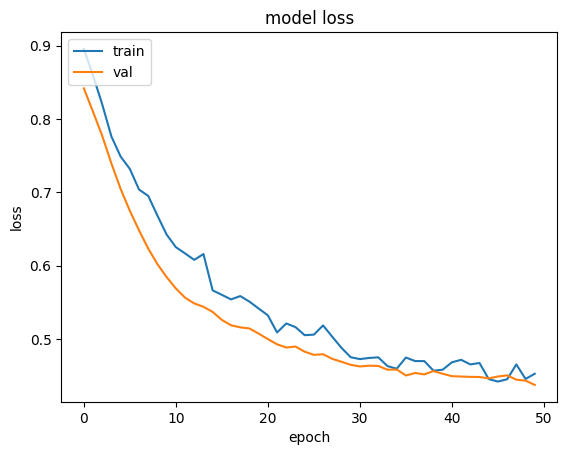

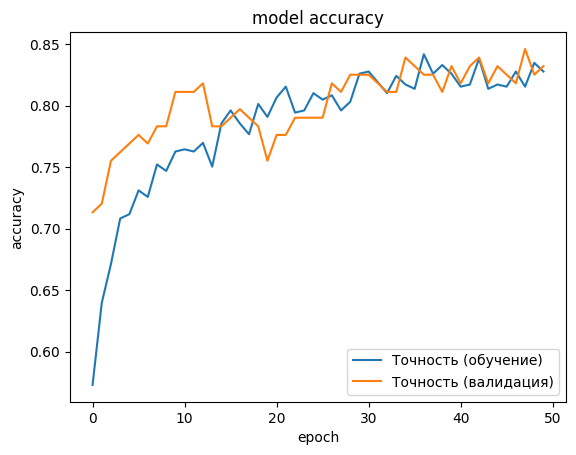

In [366]:
# Построим график потерь loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Построим график точности accuracy на обучающей и валидационной выборках
plt.plot(history.history['accuracy'], label='Точность (обучение)')
plt.plot(history.history['val_accuracy'], label='Точность (валидация)')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [367]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5654 - loss: 1.1197 - val_accuracy: 0.6154 - val_loss: 1.0924
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5666 - loss: 1.0831 - val_accuracy: 0.6503 - val_loss: 1.0426
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6470 - loss: 1.0215 - val_accuracy: 0.6503 - val_loss: 0.9900
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6053 - loss: 0.9788 - val_accuracy: 0.6503 - val_loss: 0.9410
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6277 - loss: 0.9505 - val_accuracy: 0.6503 - val_loss: 0.8990
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6311 - loss: 0.9208 - val_accuracy: 0.6573 - val_loss: 0.8612
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6360 - loss: 0.8838 - val_accuracy: 0.6853 - val_loss: 0.8265
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6189 - loss: 0.8634 - val_accuracy: 0.7413 - val_loss: 0.7947
Epoch 9/100

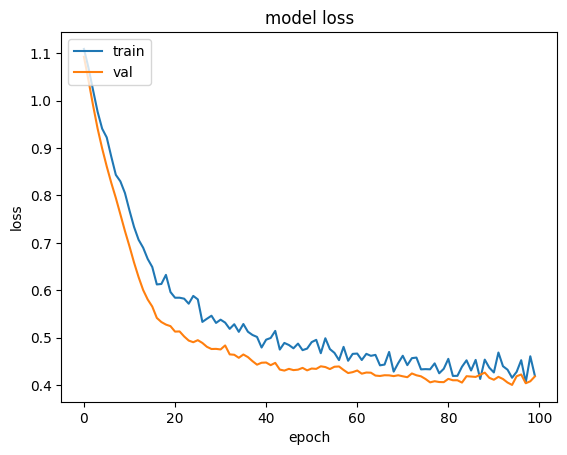

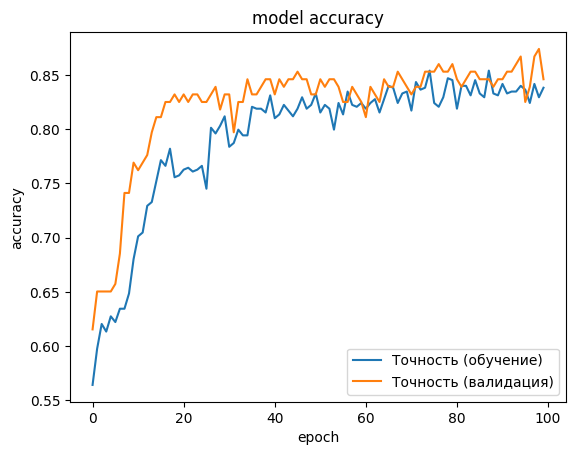

In [368]:
# Построим график потерь loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Построим график точности accuracy на обучающей и валидационной выборках
plt.plot(history.history['accuracy'], label='Точность (обучение)')
plt.plot(history.history['val_accuracy'], label='Точность (валидация)')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Наилучший результат попеременно у двух моделей - 0.84

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 1 accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179





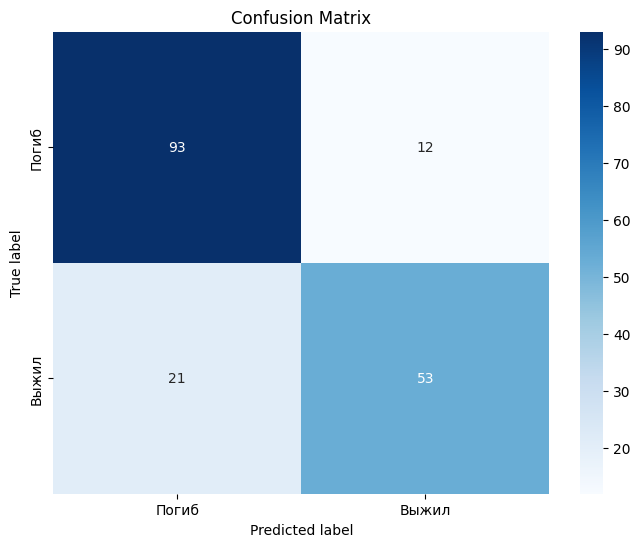

Модель предсказала, что человек погиб, и в реальности он тоже погиб =  93
Модель предсказала, что человек погиб, но в реальности он выжил =  21
Модель предсказала, что человек выжил, но в реальности он погиб =  12
Модель предсказала, что человек выжил, и в реальности он тоже выжил =  53


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 2 accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       111
           1       0.75      0.70      0.72        67

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178





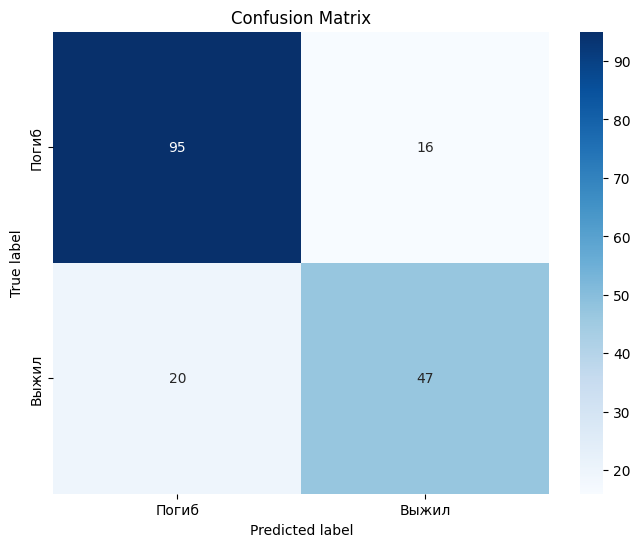

Модель предсказала, что человек погиб, и в реальности он тоже погиб =  95
Модель предсказала, что человек погиб, но в реальности он выжил =  20
Модель предсказала, что человек выжил, но в реальности он погиб =  16
Модель предсказала, что человек выжил, и в реальности он тоже выжил =  47


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 3 accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       108
           1       0.87      0.77      0.82        70

    accuracy                           0.87       178
   macro avg       0.87      0.85      0.86       178
weighted avg       0.87      0.87      0.86       178





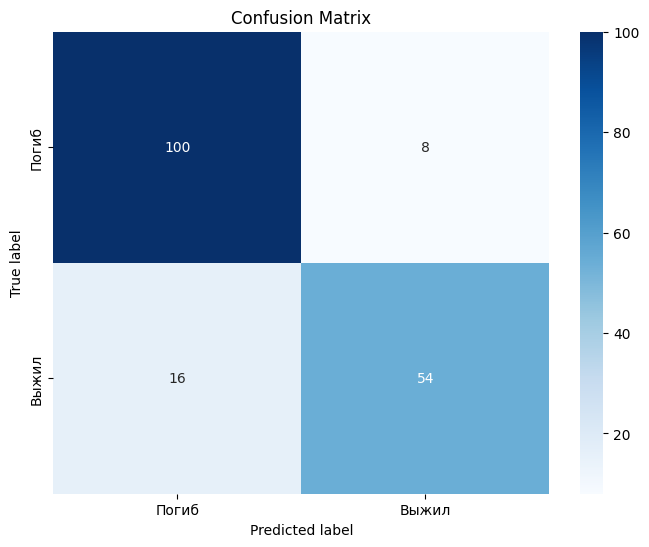

Модель предсказала, что человек погиб, и в реальности он тоже погиб =  100
Модель предсказала, что человек погиб, но в реальности он выжил =  16
Модель предсказала, что человек выжил, но в реальности он погиб =  8
Модель предсказала, что человек выжил, и в реальности он тоже выжил =  54


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 4 accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       112
           1       0.84      0.64      0.72        66

    accuracy                           0.82       178
   macro avg       0.83      0.78      0.80       178
weighted avg       0.82      0.82      0.81       178





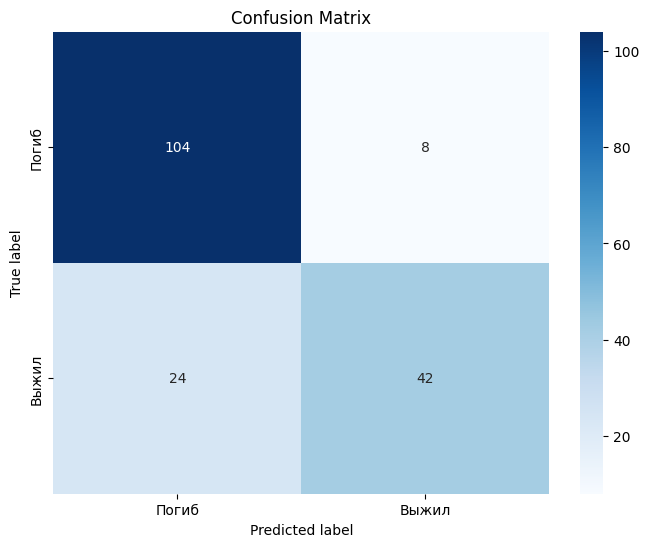

Модель предсказала, что человек погиб, и в реальности он тоже погиб =  104
Модель предсказала, что человек погиб, но в реальности он выжил =  24
Модель предсказала, что человек выжил, но в реальности он погиб =  8
Модель предсказала, что человек выжил, и в реальности он тоже выжил =  42


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 5 accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       113
           1       0.86      0.66      0.75        65

    accuracy                           0.84       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.84      0.84      0.83       178





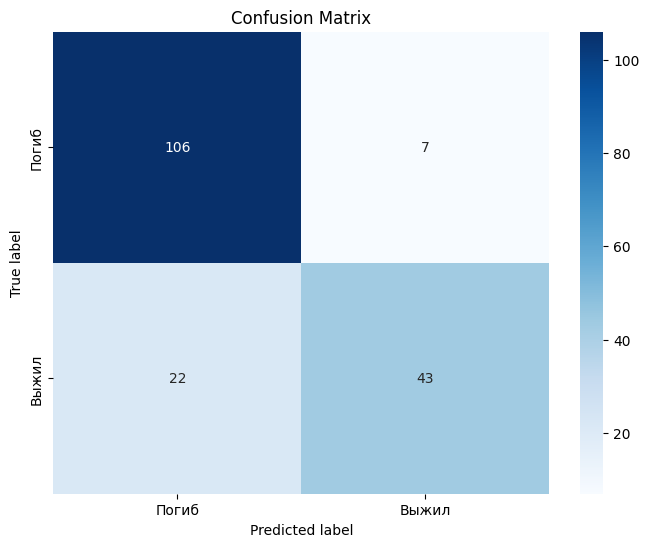

Модель предсказала, что человек погиб, и в реальности он тоже погиб =  106
Модель предсказала, что человек погиб, но в реальности он выжил =  22
Модель предсказала, что человек выжил, но в реальности он погиб =  7
Модель предсказала, что человек выжил, и в реальности он тоже выжил =  43


Mean accuracy: 0.83


In [369]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2

# Параметры кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Скалирование данных
scaler = StandardScaler()

# Функция для создания модели
def create_model(input_shape):
    # 1 модель
#     model = Sequential()
#     model.add(Input(shape=(input_shape,)))
#     model.add(Input(shape=(input_shape,)))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # 2 модель
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Списки для хранения результатов
accuracies = []

# Функция для отображения матрицы ошибок
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Цикл по фолдам кросс-валидации
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Создаем и обучаем модель
    model = create_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
    
    # Оцениваем модель
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Преобразуем вероятности в метки классов
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Печатаем результаты для текущего фолда
    print(f'Fold {fold + 1} accuracy: {accuracy:.2f}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Генерация и отображение матрицы ошибок
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Погиб', 'Выжил'])  # Замените названия классов по необходимости
    print("Модель предсказала, что человек погиб, и в реальности он тоже погиб = ", cm[0, 0])
    print("Модель предсказала, что человек погиб, но в реальности он выжил = ", cm[1, 0])
    print("Модель предсказала, что человек выжил, но в реальности он погиб = ", cm[0, 1])
    print("Модель предсказала, что человек выжил, и в реальности он тоже выжил = ", cm[1, 1])
    print("\n")

# Средняя точность по всем фолдам
print(f'Mean accuracy: {np.mean(accuracies):.2f}')


Лучший результат кросс-валидации - 0.83


# Вывод о проделанной работе

В рамках данного проекта была проведена работа, основными этапами которой являются:
* Анализ данных, составлении стастистики и поиск закономерностей
* Обработка данных и feature engineering
* Построение модели машинного обучения для предсказания выживаемости пассажиров на борту Titanic 

Были проанализированы характеристики датасета, на основе которых были построены **следующие графики**:
1. Распределение выживаемости пассажиров
1. Распределение выживаемости пассажиров в зависимости от пола
1. Распределение возрастов выживших и невыживших
1. Распределение выживаемости по классу
1. Влияние размера семьи на выживаемость
1. Выживаемость по типу каюты

Выполнена предобработка данных, включая обработку пропусков и преобразование категориальных признаков в числовые, а также сделаны выводы, которые помогли при дальнейшем feature engineering. Были созданы **следующие признаки**:
* AgeBand - возрастная категория пассажира
* FareBand - ценовая категория билета пассажира
* IsAlone - одинокий ли пассажир
* FamilySize - размер семьи пассажира

Построены матрицы ошибок и графики классификации, что дало возможность визуализировать производительность модели и понять, где она ошибается.

**Заключение**

В результате проделанной работы была разработана модель, способная предсказывать выживаемость пассажиров Titanic. Графики и визуализации оказались полезными для понимания данных и проверки гипотез.